# Experimental Spectra Filtering Results

In [1]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator
import numpy as np
from numpy import asarray
import pandas as pd
import math
import seaborn as sns  #heat map
import glob # batch processing of images


import matplotlib.font_manager as fm
import random
import sys
import os

from sklearn.datasets import make_regression
import tensorflow as tf
from sklearn.metrics import confusion_matrix    #confusion matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
# print(font_names)

from scipy import signal
from scipy import interpolate




from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF

#Sklearn model saving and loading
from joblib import dump, load

if '../../' not in sys.path:
    sys.path.append('../../')

from aimos.spectral_datasets.THz_datasets import THz_data

from aimos.misc.utils import simple_plotter





2022-10-18 15:18:00.198461: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
from oneida import THz_mixture_data
from oneida_utils import concentrations_to_one_hot_encode, create_mixture_names

In [3]:
# load experiments


In [4]:
# def exp_spectrum_fig(frequencies, absorbances, title):
#     plt.figure(figsize=(16,10), dpi=150)
#     spectrum_plot = plt.plot(frequencies, absorbances/max(absorbances), linewidth = 0.7, color = 'black')
#     plt.xlabel('Frequency ($cm^{-1}$)', fontsize='large')
#     plt.ylabel('Norm. Abs.', fontsize='large')
#     plt.title(title, fontsize='large')
#     plt.xlim([frequencies[0], frequencies[-1]])
    
#     plt.savefig(r'RESULTS/data_analytics/' + experiment + '.png', bbox_inches='tight')
    
    
#     return spectrum_plot

In [5]:

# exps = ['2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 50% Dilute CM-ACN.xlsx',
# '2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Pure Mix CM-ACN.xlsx',
# '2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 90% Dilute CM-ACN.xlsx',
# '3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 1.xlsx',
# '3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 2.xlsx',
# '4 Comp-mix_ 67% CH3OH + 30% CH3CHO + 2% CH3Cl + 1% CH3CN/0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2.xlsx']

exps = ['4 Comp-mix_ 67% CH3OH + 30% CH3CHO + 2% CH3Cl + 1% CH3CN/0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2.xlsx']


exp_path = '../../data/Mixture_exp_data/'
exp_filepath = '4 Comp-mix_ 67% CH3OH + 30% CH3CHO + 2% CH3Cl + 1% CH3CN/0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2.xlsx'


# def classify_exp(exp_path,exp_filepath,mixture_types):

    
    
    

In [6]:
from oneida_filters import FFT_filter

File: 4 Comp-mix_ 67% CH3OH + 30% CH3CHO + 2% CH3Cl + 1% CH3CN/0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2.xlsx
PSD_cutoff 0.005


/home/reshad812/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


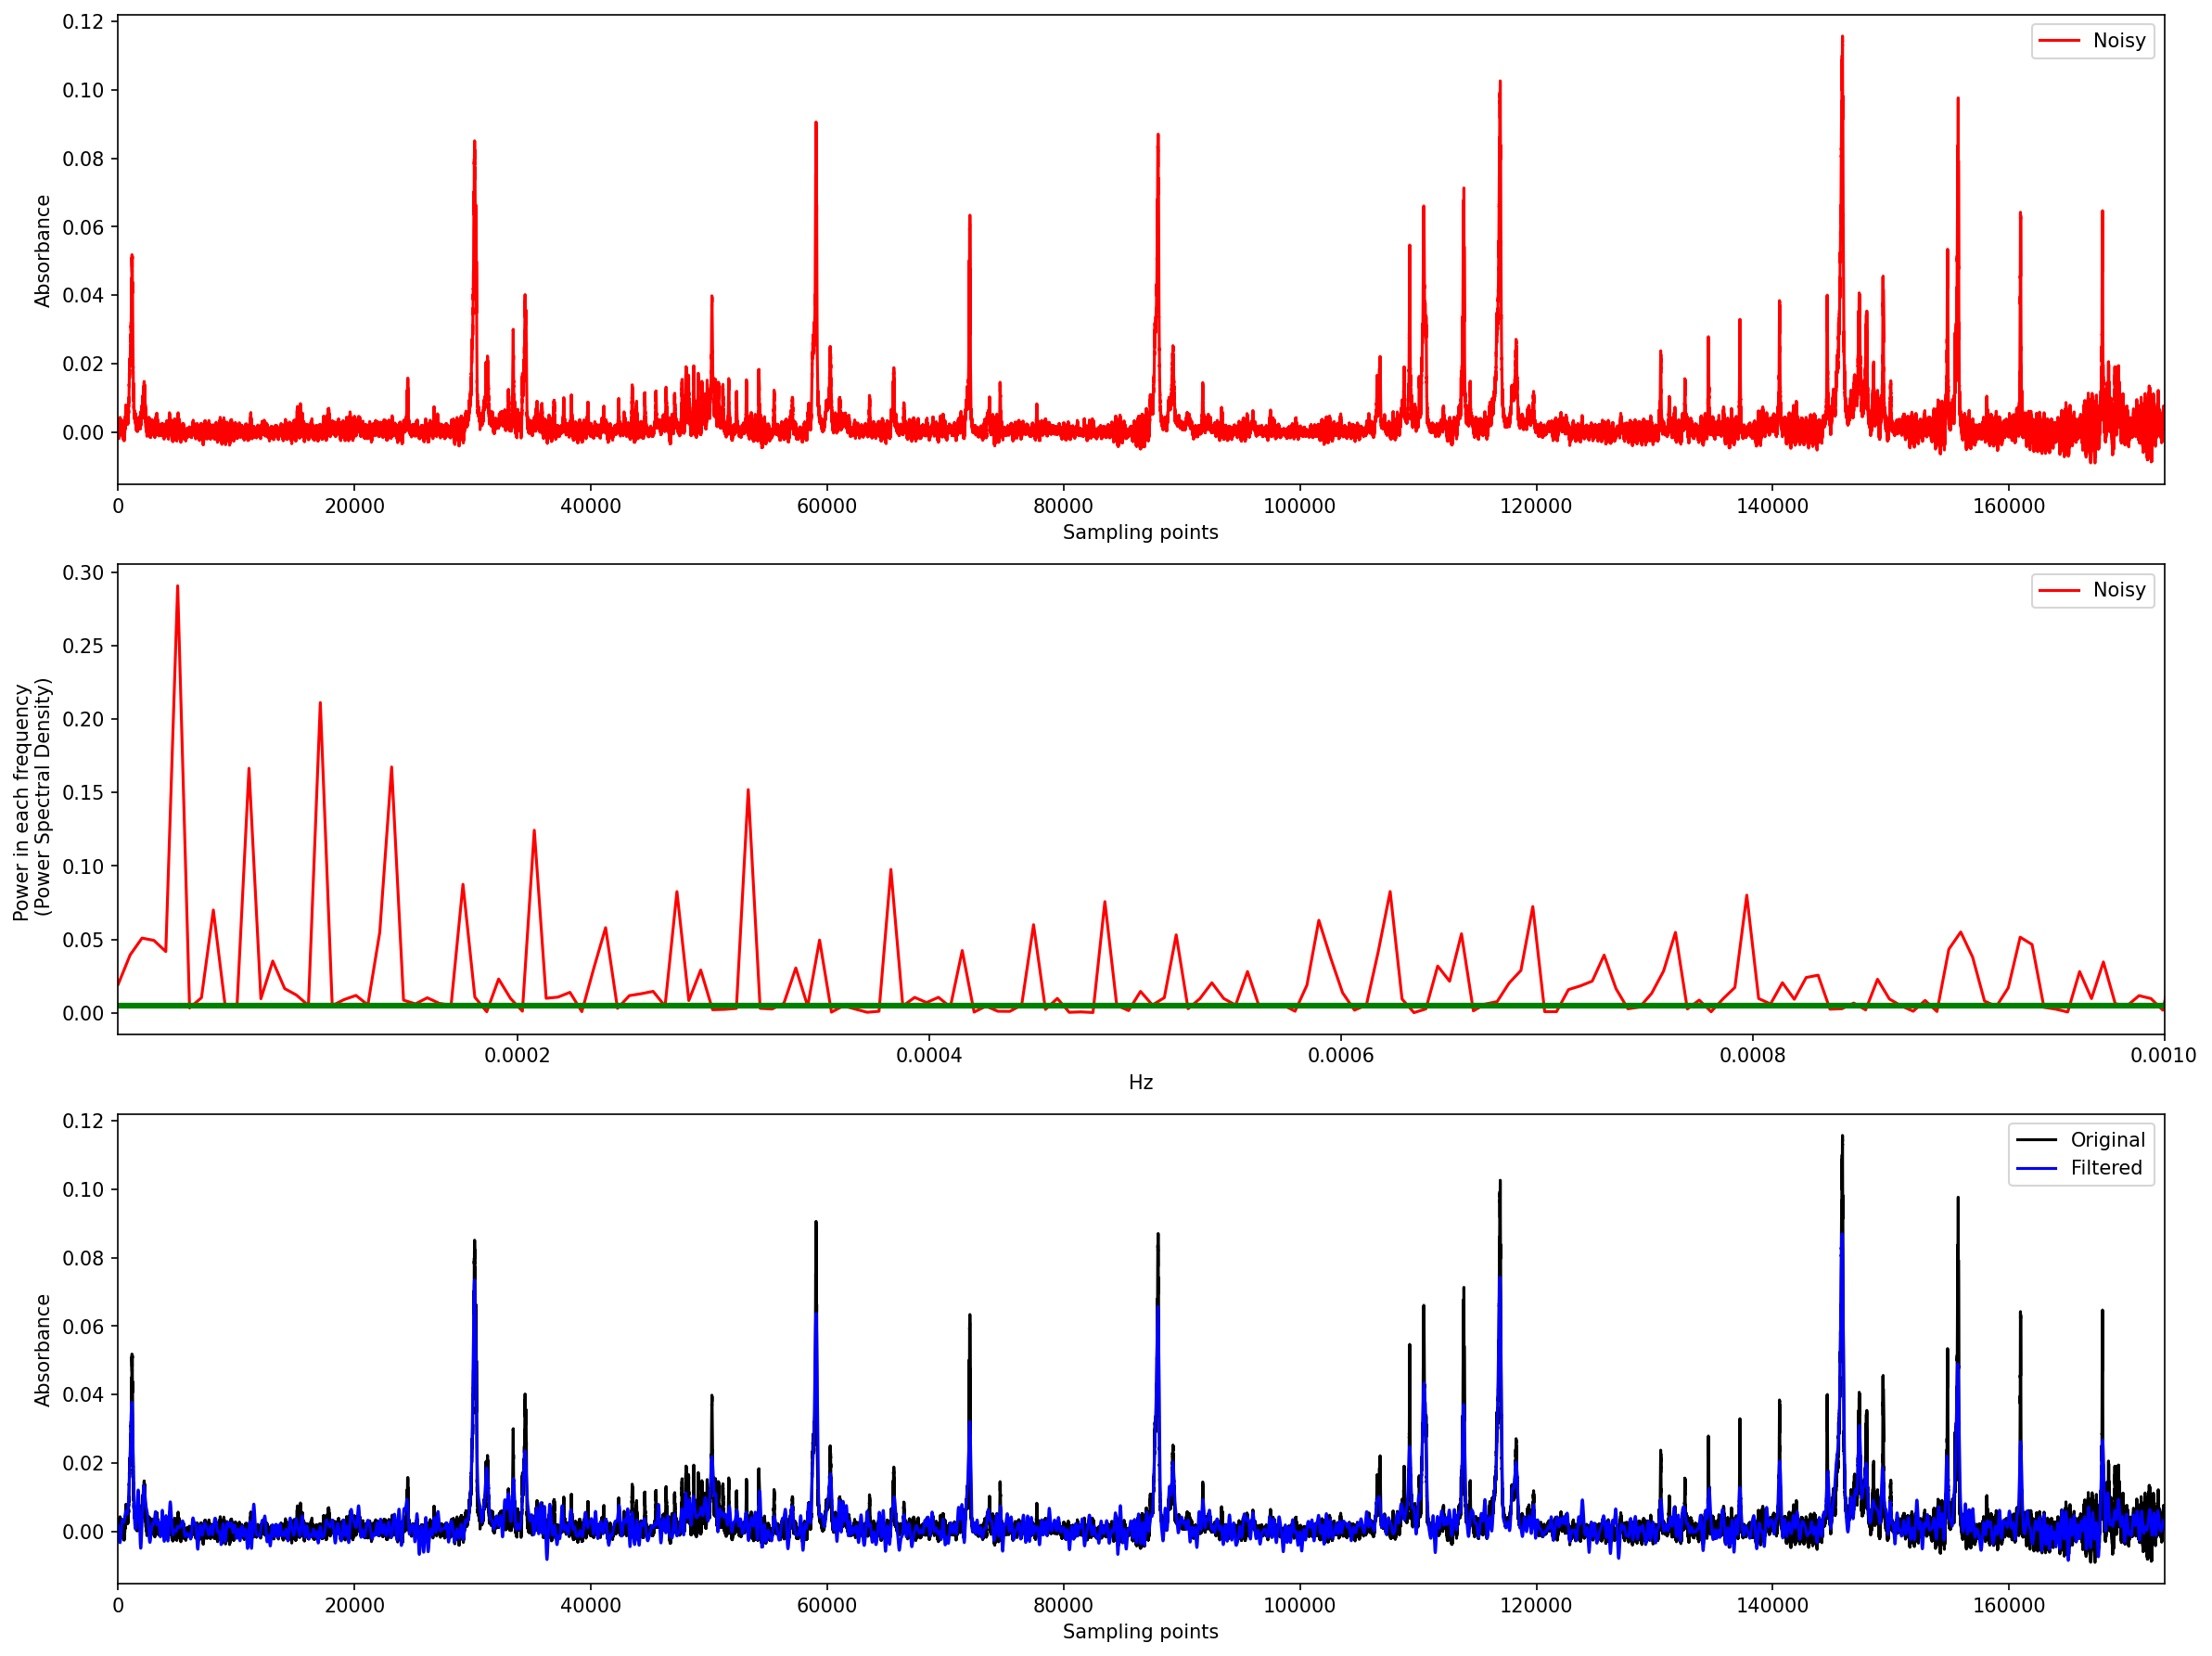

In [7]:
idx = 0
for experiment in exps:
    df_exp1 = pd.read_excel(exp_path + experiment)
    print('File:',experiment)
    abs_exp1 = df_exp1[df_exp1.columns[1]].to_numpy()
    f = abs_exp1
    PSD_cutoff=0.005
    resampled_pts=229
    dt=1
    print('PSD_cutoff', PSD_cutoff)
    filtered_abs, fig=FFT_filter(dt, f, PSD_cutoff = PSD_cutoff, make_plots= True);

    filtered_abs_resampled= signal.resample(filtered_abs, resampled_pts)
    expanded_abs = np.expand_dims(np.expand_dims(filtered_abs_resampled, axis=-1), axis=0)

In [10]:
fig.savefig(r'RESULTS/filtered_spectra/' + '0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2' + '_PSD='+ str(PSD_cutoff)+ '_filtered.png', bbox_inches='tight')

In [44]:
from scipy import fftpack


peak_freq 0.0017325617658269519


/home/reshad812/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


peak_freq 0.0017325717717856463


/home/reshad812/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


peak_freq 0.001732291648621962


/home/reshad812/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


peak_freq 0.0017326218033127728


/home/reshad812/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


peak_freq 0.0017328119494712038


/home/reshad812/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


peak_freq 0.0017328619948707284


/home/reshad812/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


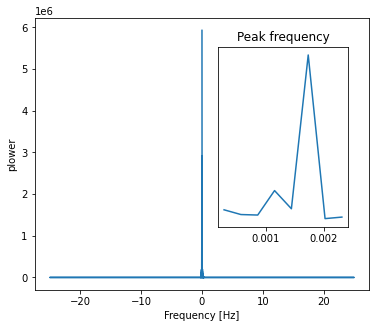

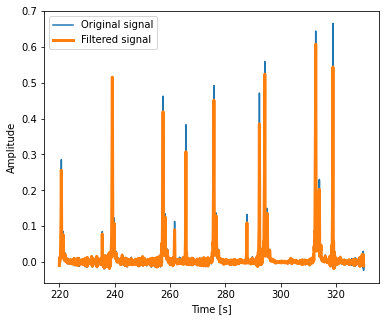

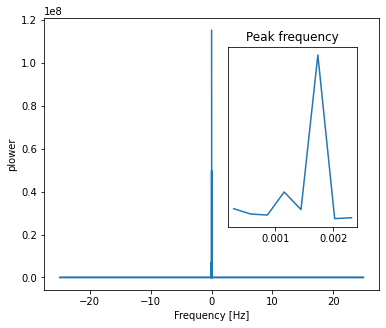

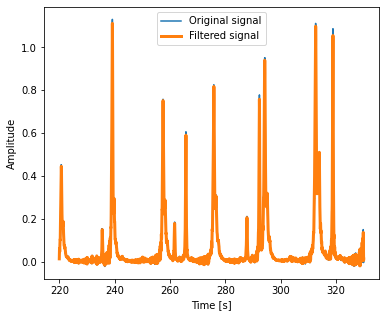

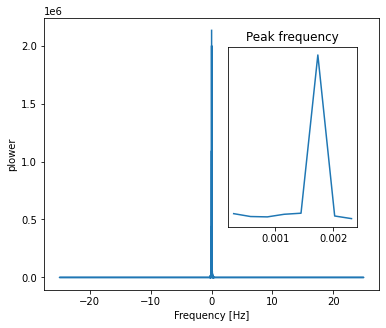

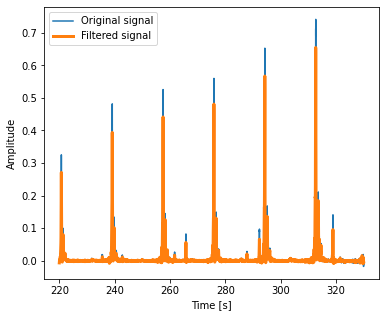

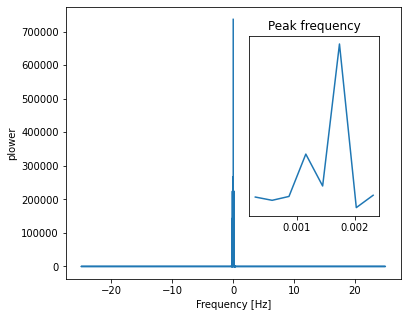

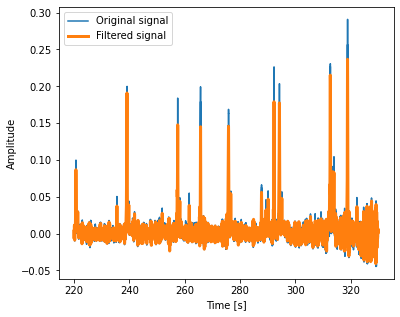

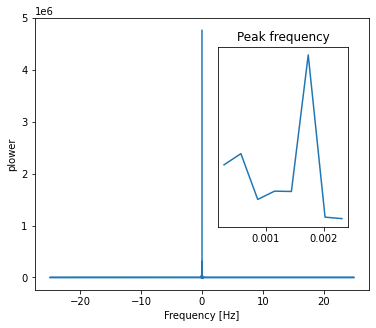

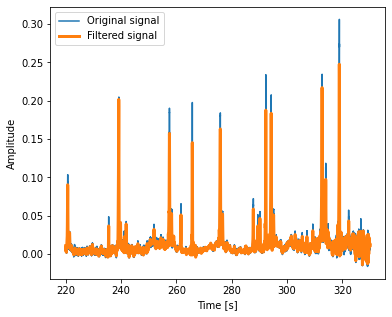

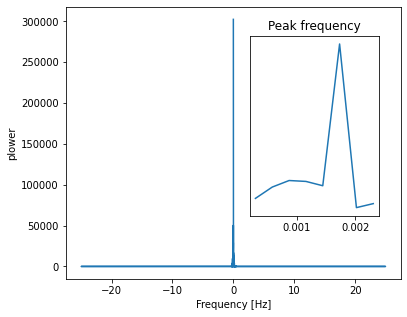

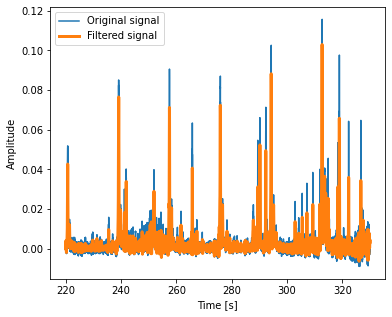

In [45]:
idx = 0
for experiment in exps:
    df_exp1 = pd.read_excel(exp_path + experiment)


    freq_exp1 = df_exp1[df_exp1.columns[0]].to_numpy()
    abs_exp1 = df_exp1[df_exp1.columns[1]].to_numpy()

#     exp_spectrum_fig(freq_exp1, abs_exp1, experiment)
    
    frequencies = freq_exp1
    absorbances = abs_exp1
    
    sig=absorbances
    time_vec=frequencies
    # The FFT of the signal
    sig_fft = fftpack.fft(sig)

    # And the power (sig_fft is of complex dtype)
    power = np.abs(sig_fft)**2

    # The corresponding frequencies
    sample_freq = fftpack.fftfreq(sig.size, d=time_step)

    # Plot the FFT power
    plt.figure(figsize=(6, 5))
    plt.plot(sample_freq, power)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('plower')

    # Find the peak frequency: we can focus on only the positive frequencies
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    peak_freq = freqs[power[pos_mask].argmax()]

    # Check that it does indeed correspond to the frequency that we generate
    # the signal with
    np.allclose(peak_freq, 1./period)

    # An inner plot to show the peak frequency
    axes = plt.axes([0.55, 0.3, 0.3, 0.5])
    plt.title('Peak frequency')
    plt.plot(freqs[:8], power[pos_mask][:8])
    plt.setp(axes, yticks=[])

    # scipy.signal.find_peaks_cwt can also be used for more advanced
    # peak detection

    print('peak_freq', peak_freq)
    sel_peak_freq = 100*peak_freq
    high_freq_fft = sig_fft.copy()
    high_freq_fft[np.abs(sample_freq) > sel_peak_freq] = 0
    filtered_sig = fftpack.ifft(high_freq_fft)

    plt.figure(figsize=(6, 5))
    plt.plot(time_vec, sig, label='Original signal')
    plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.legend(loc='best')  
    
    
    # export

    filtered_df = pd.DataFrame()
    filtered_df['Freq [GHz]'] = freq_exp1
    filtered_df['Aavg'] = filtered_sig
    savename = exp_path + experiment
    savename.replace('.xlsx', '_filtered.csv')
    filtered_df.to_csv(savename)

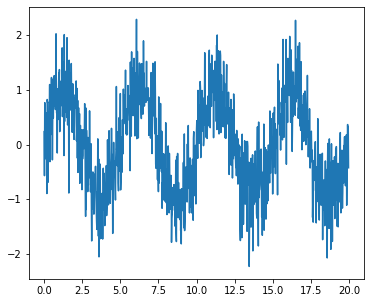

In [12]:
# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')


In [19]:
fft_filter(frequencies, absorbances, factor=100)

In [46]:
from scipy import fftpack
def fft_filter(frequencies, absorbances, factor=100):
    sig=absorbances
    time_vec=frequencies
    # The FFT of the signal
    sig_fft = fftpack.fft(sig)

    # And the power (sig_fft is of complex dtype)
    power = np.abs(sig_fft)**2

    # The corresponding frequencies
    sample_freq = fftpack.fftfreq(sig.size, d=1.0)



    # Find the peak frequency: we can focus on only the positive frequencies
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    peak_freq = freqs[power[pos_mask].argmax()]

    # Check that it does indeed correspond to the frequency that we generate
    # the signal with
    np.allclose(peak_freq, 1./period)

    # An inner plot to show the peak frequency
    axes = plt.axes([0.55, 0.3, 0.3, 0.5])
    plt.title('Peak frequency')
    plt.plot(freqs[:8], power[pos_mask][:8])
    plt.setp(axes, yticks=[])

    # scipy.signal.find_peaks_cwt can also be used for more advanced
    # peak detection

    print('peak_freq', peak_freq)
    sel_peak_freq = factor*peak_freq
    high_freq_fft = sig_fft.copy()
    high_freq_fft[np.abs(sample_freq) > sel_peak_freq] = 0
    filtered_sig = fftpack.ifft(high_freq_fft)



peak_freq 0.0017328619948707284


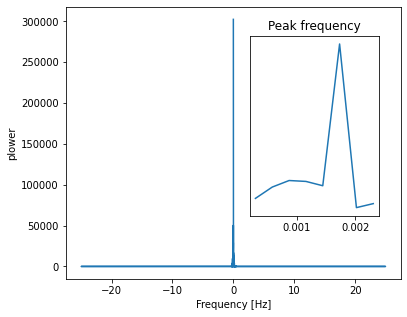

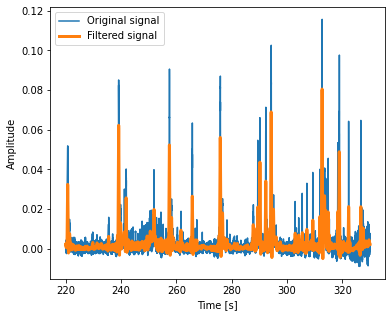

In [49]:
from scipy import fftpack

sig=absorbances
time_vec=frequencies
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[pos_mask][:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

print('peak_freq', peak_freq)
sel_peak_freq = 50*peak_freq
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > sel_peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

0.0017328619948707284


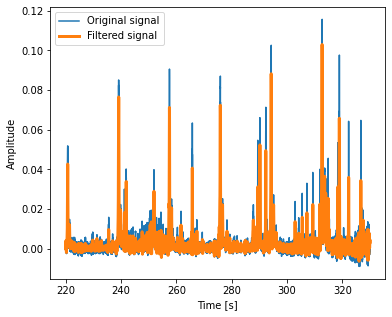

0.0017328619948707284

Experiment name:  2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 50% Dilute CM-ACN.xlsx
Experiment name:  2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Pure Mix CM-ACN.xlsx
Experiment name:  2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 90% Dilute CM-ACN.xlsx
Experiment name:  3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 1.xlsx
Experiment name:  3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 2.xlsx
Experiment name:  4 Comp-mix_ 67% CH3OH + 30% CH3CHO + 2% CH3Cl + 1% CH3CN/0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2.xlsx


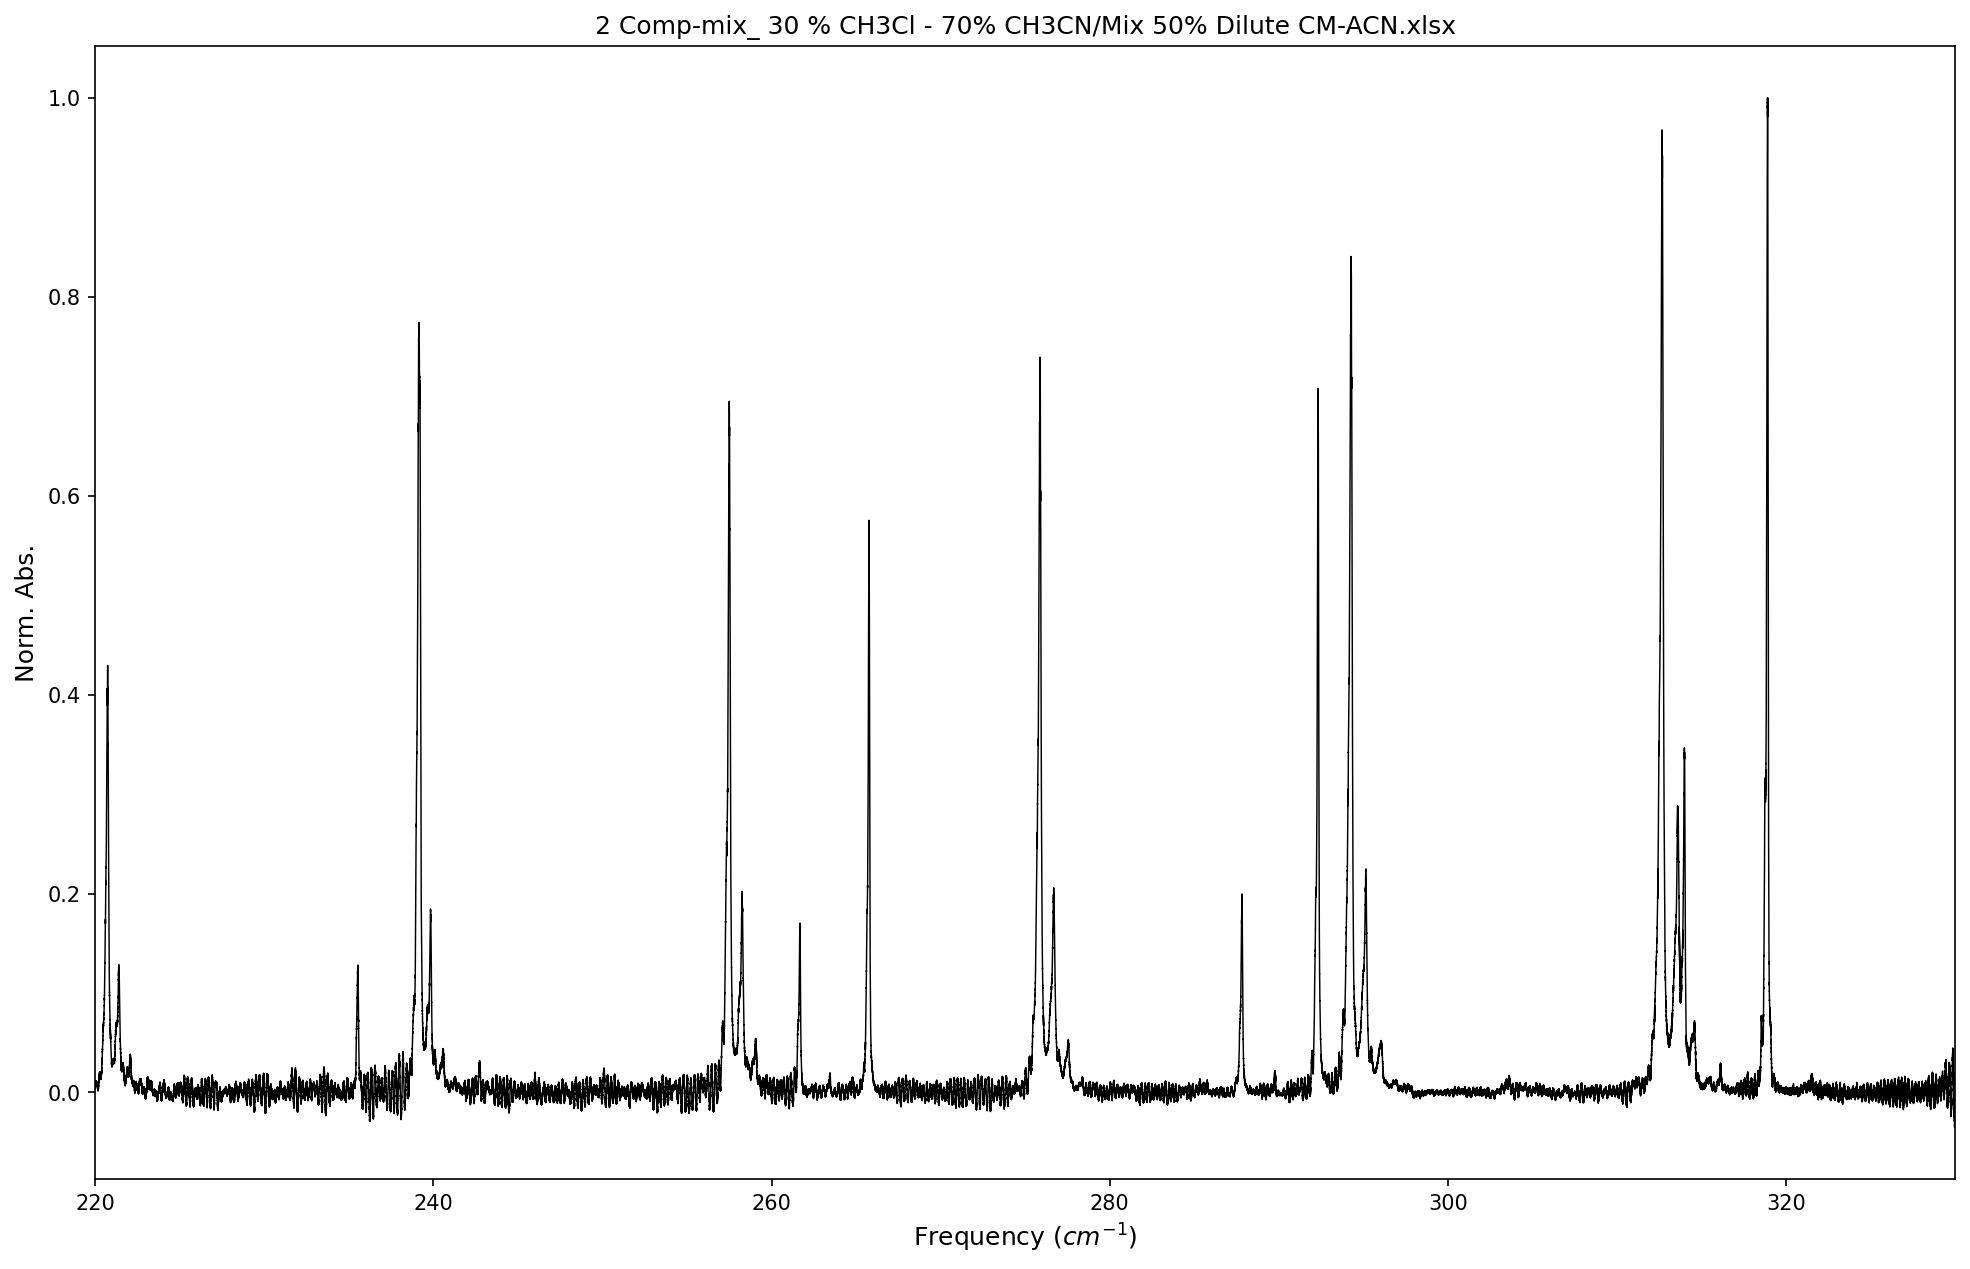

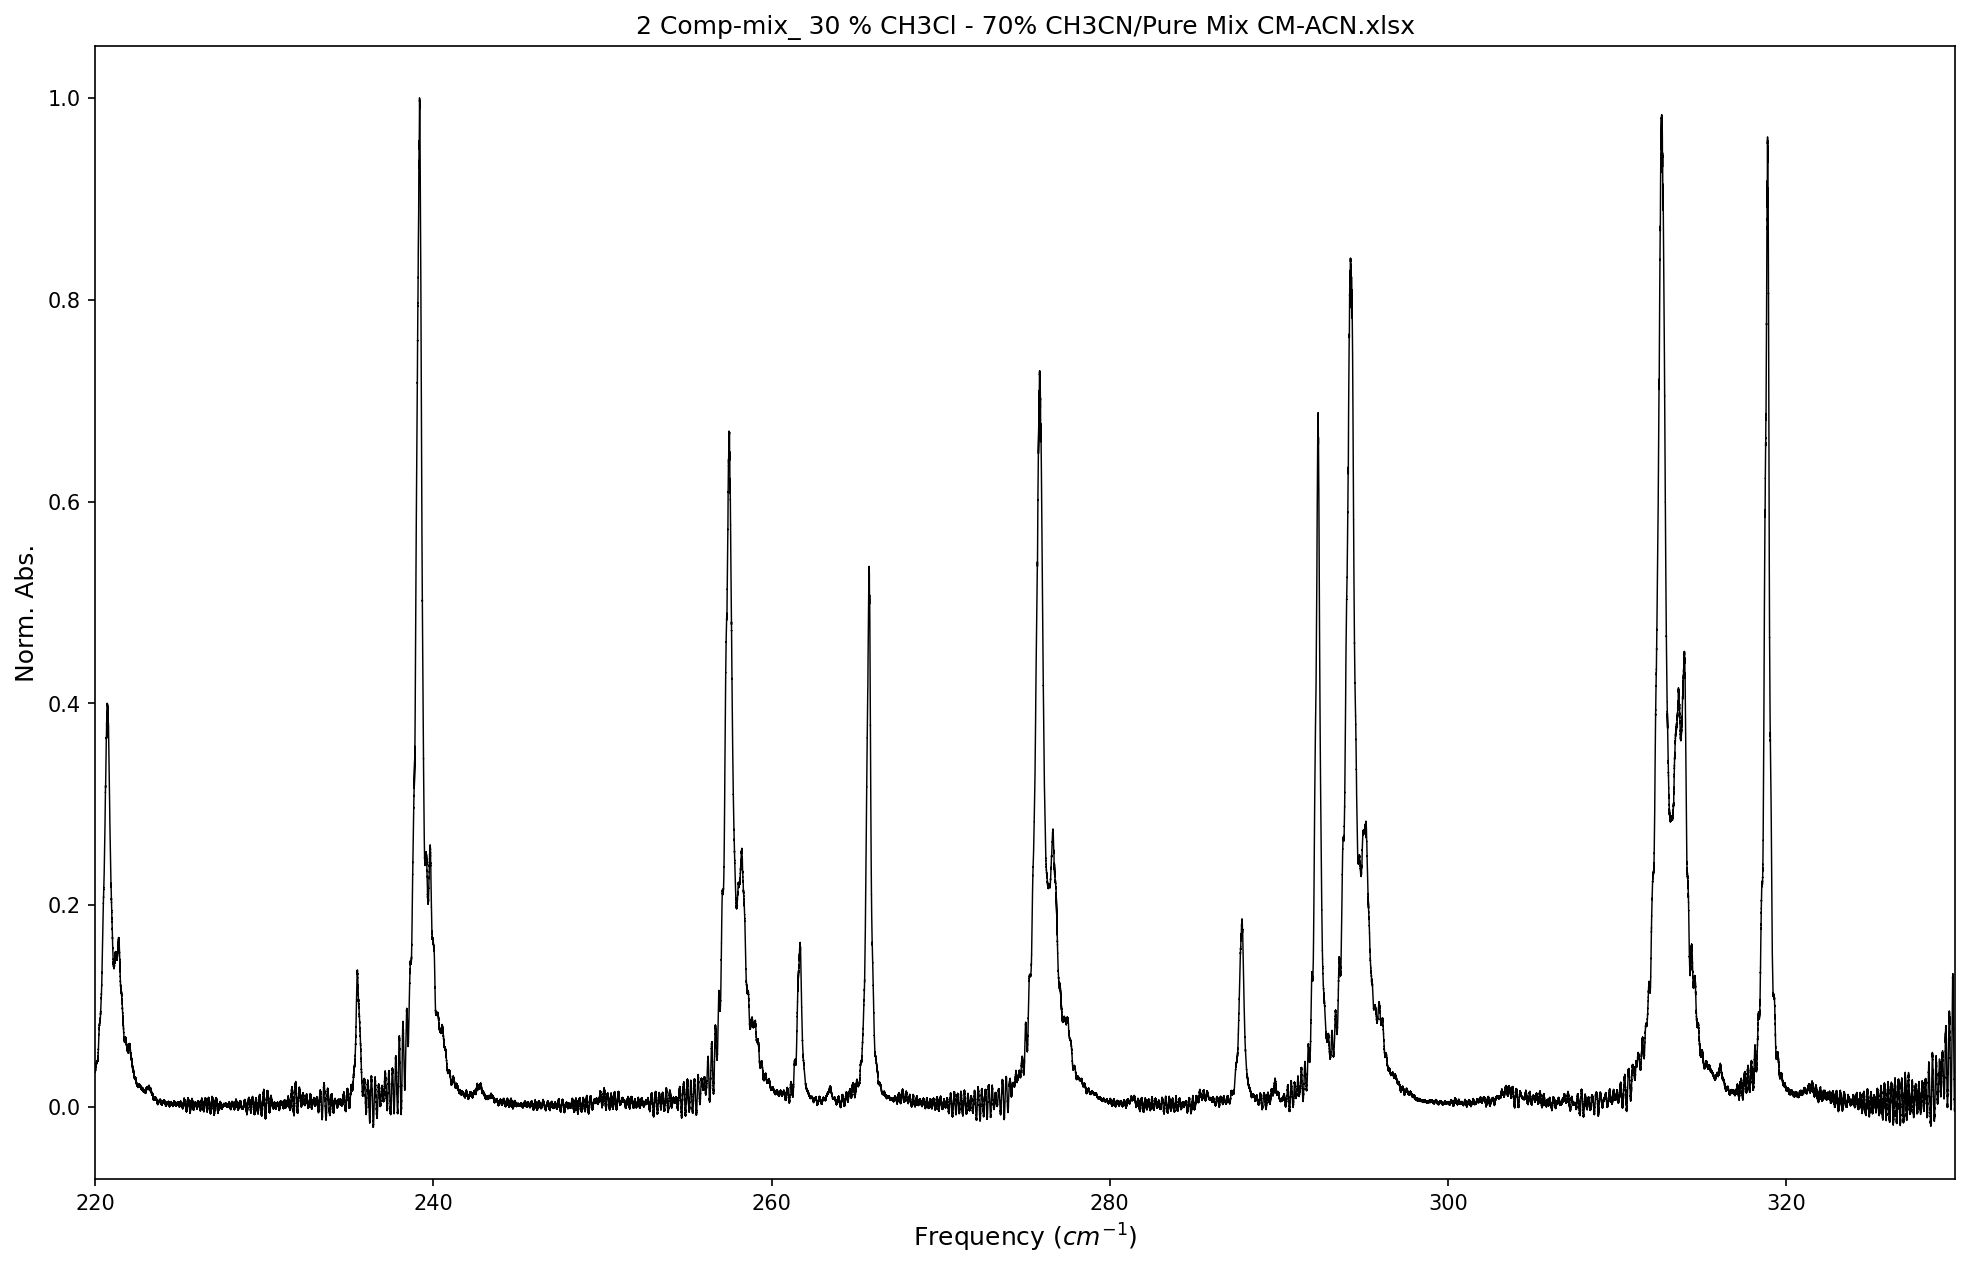

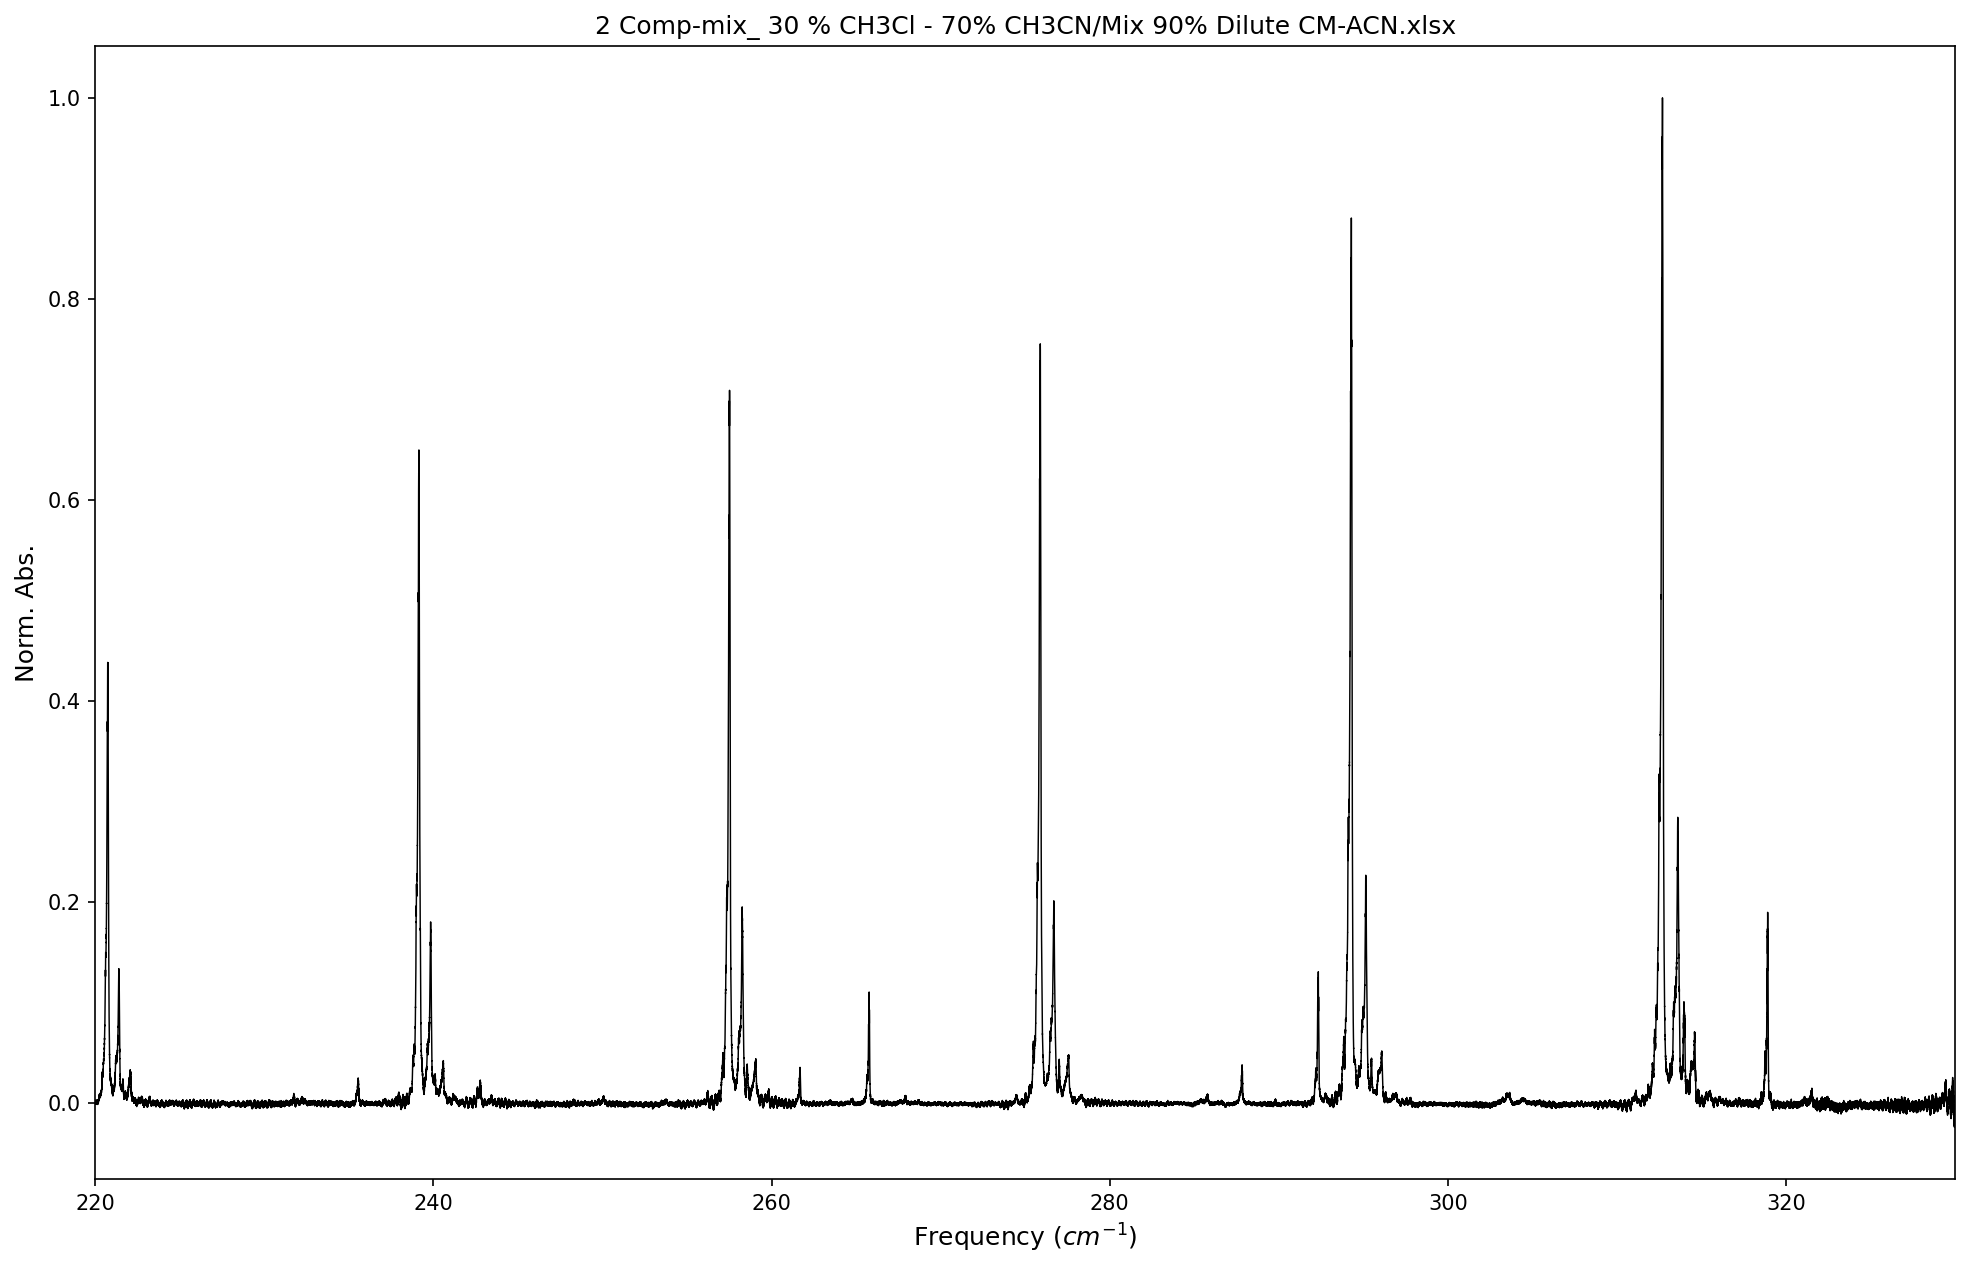

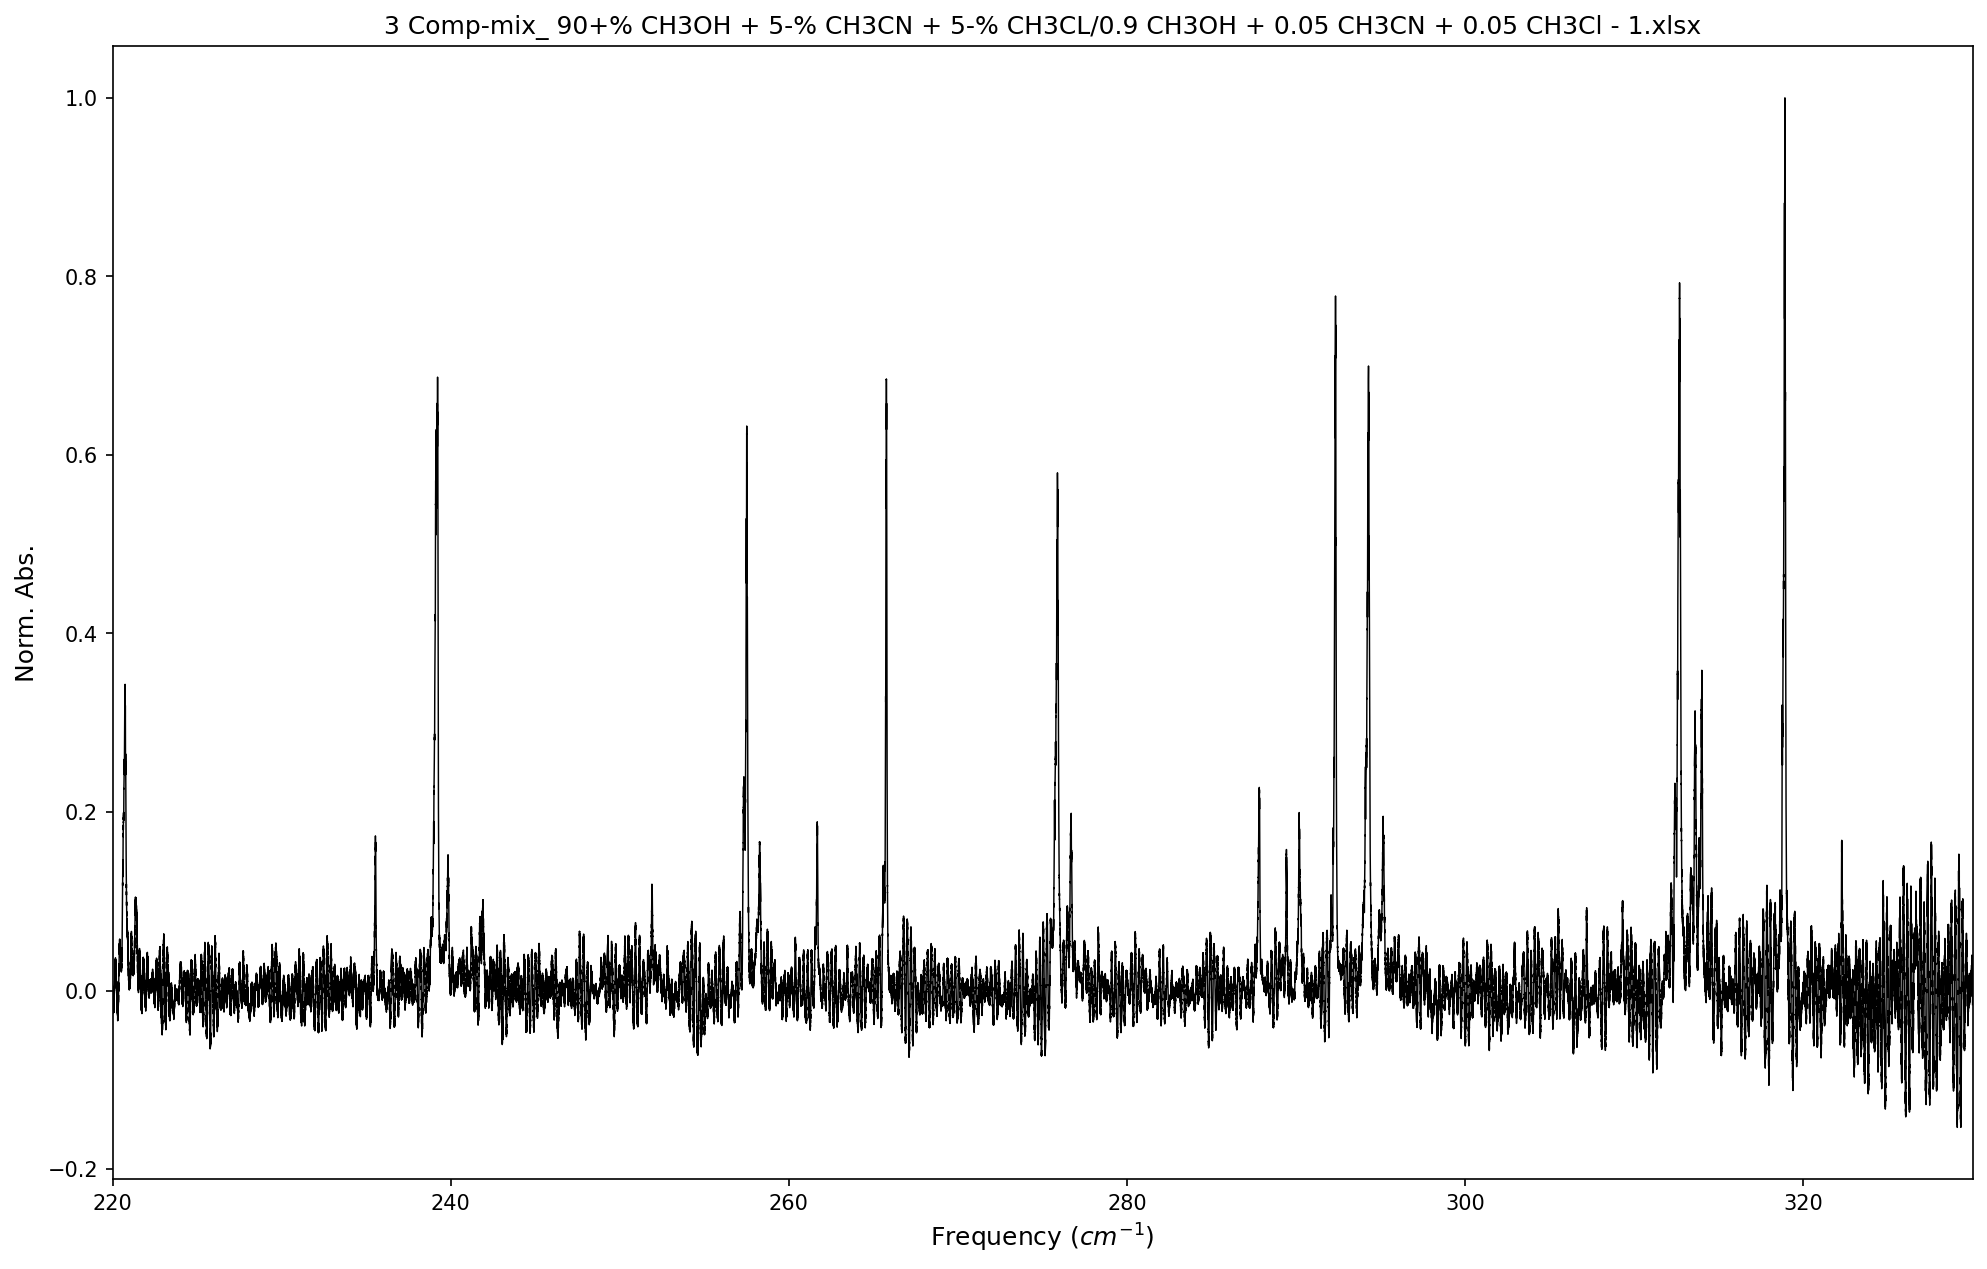

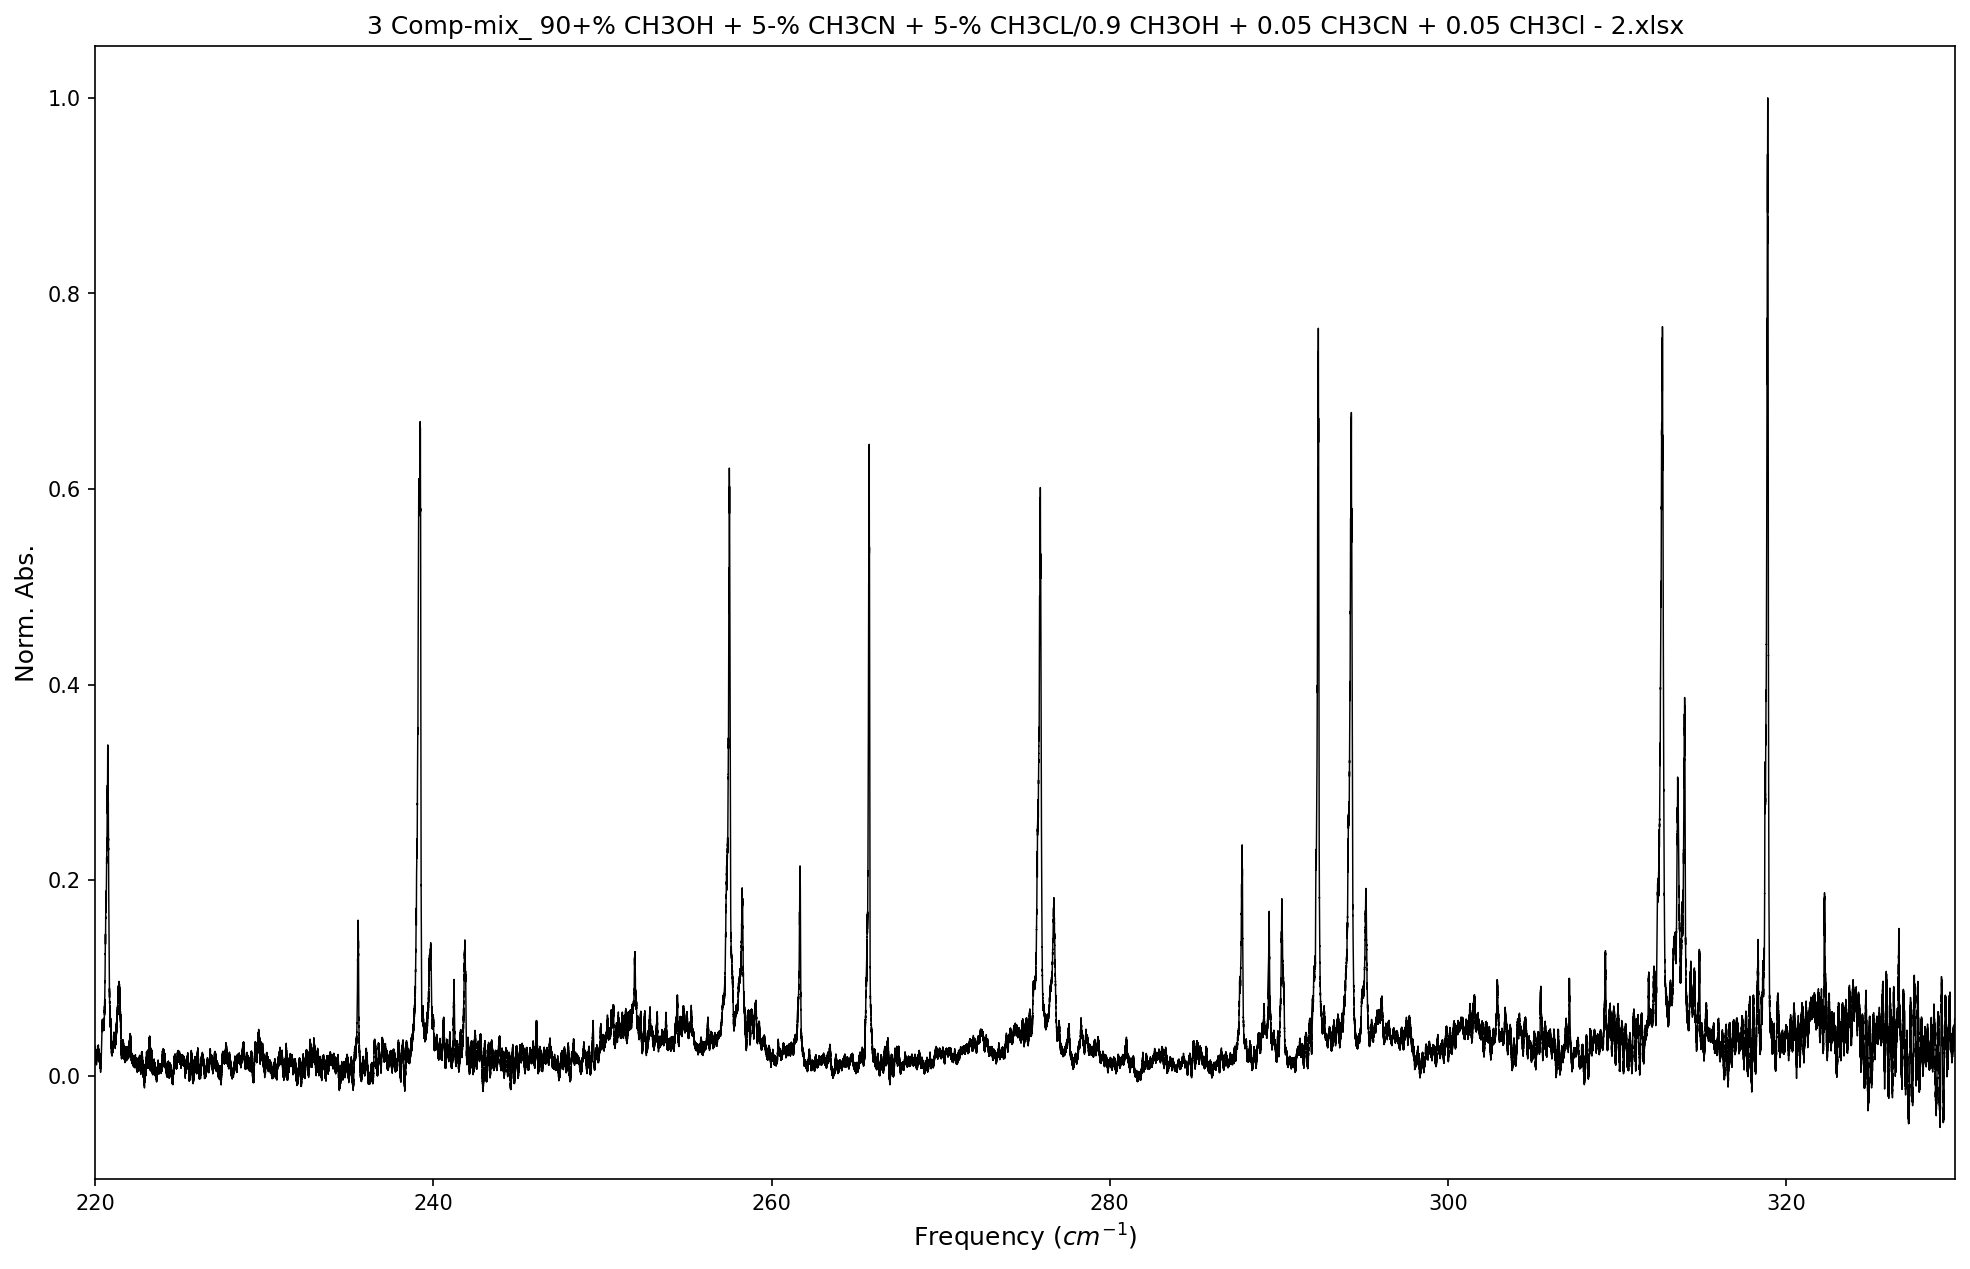

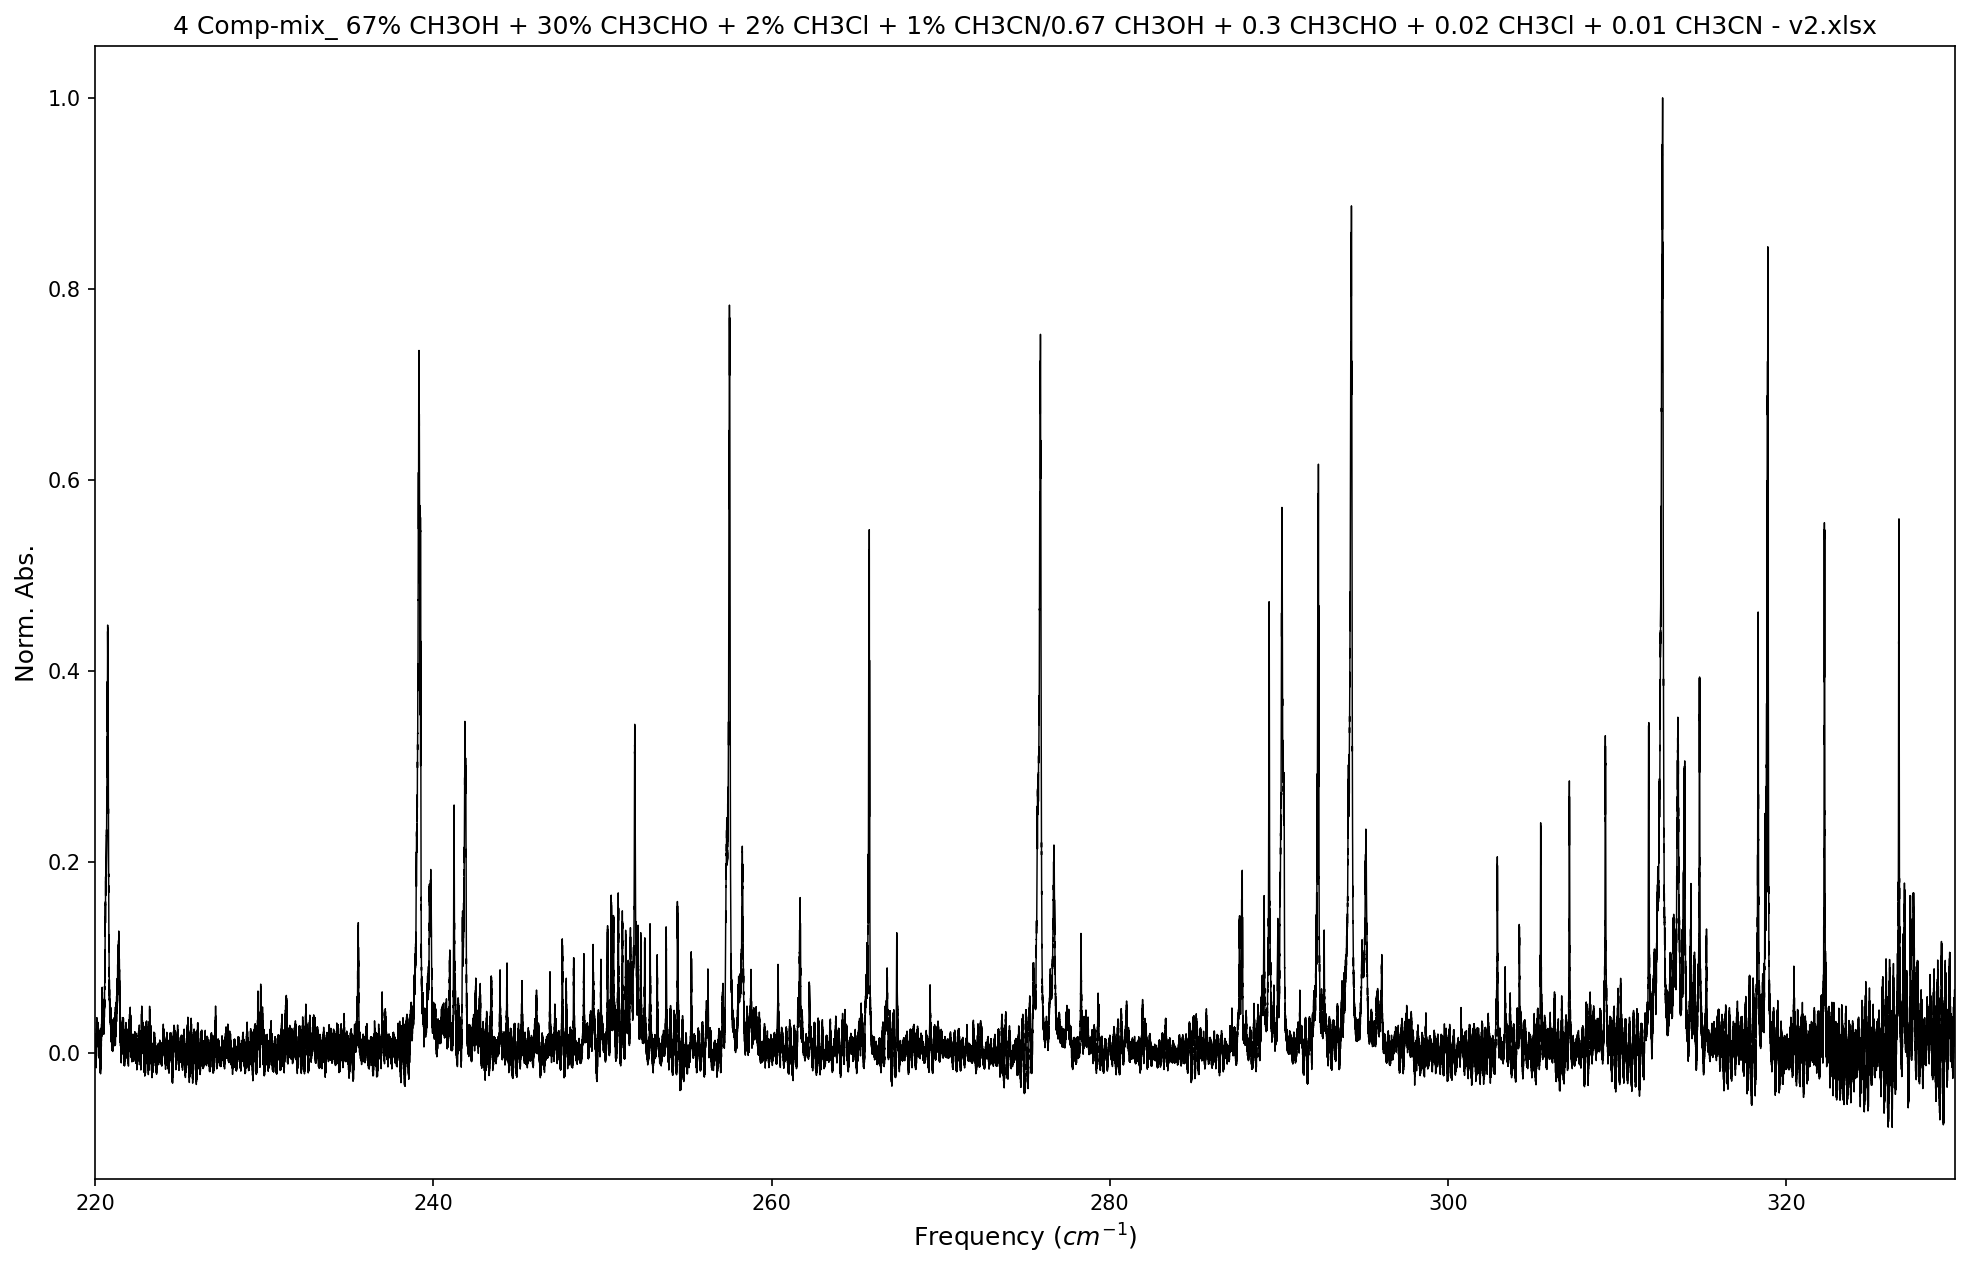

In [26]:
idx = 0
for experiment in exps:
    df_exp1 = pd.read_excel(exp_path + experiment)


    freq_exp1 = df_exp1[df_exp1.columns[0]].to_numpy()
    abs_exp1 = df_exp1[df_exp1.columns[1]].to_numpy()

#     exp_spectrum_fig(freq_exp1, abs_exp1, experiment)
    
    frequencies = freq_exp1
    absorbances = abs_exp1
    
    plt.figure(figsize=(16,10), dpi=150)
    spectrum_plot = plt.plot(frequencies, absorbances/max(absorbances), linewidth = 0.7, color = 'black')
    plt.xlabel('Frequency ($cm^{-1}$)', fontsize='large')
    plt.ylabel('Norm. Abs.', fontsize='large')
    plt.title(experiment, fontsize='large')
    plt.xlim([frequencies[0], frequencies[-1]])
    
    plt.savefig(r'RESULTS/data_analytics/'+'exp' + str(idx) + '.png', bbox_inches='tight')
    
    print('Experiment name: ',experiment)
    idx+=1
    

In [78]:
# TO-DO
# document experimental results
# distribution of 1,2,3,4,5 component mixtures
# grad cam on val, test and exps
# precision-recall curve (conventional), may need to add sklearn metrics to tensorflow model via metrics argument see tutorial for imbalanced dataset
# concentration wise how many was correctly classified
# keras tuning and redo whole

In [79]:
freq_exp1

array([220.        , 220.00063513, 220.00127026, ..., 329.99872912,
       329.99936456, 330.        ])

In [76]:
# df_exp1 = pd.read_excel('../../data/Mixture_exp_data/2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 50% Dilute CM-ACN.xlsx')
# df_exp1 = pd.read_excel('../../data/Mixture_exp_data/2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Pure Mix CM-ACN.xlsx')
# df_exp1 = pd.read_excel('../../data/Mixture_exp_data/2 Comp-mix_ 30 % CH3Cl - 70% CH3CN/Mix 90% Dilute CM-ACN.xlsx')
# df_exp1 = pd.read_excel('../../data/Mixture_exp_data/3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 1.xlsx')
# df_exp1 = pd.read_excel('../../data/Mixture_exp_data/3 Comp-mix_ 90+% CH3OH + 5-% CH3CN + 5-% CH3CL/0.9 CH3OH + 0.05 CH3CN + 0.05 CH3Cl - 2.xlsx')
df_exp1 = pd.read_excel('../../data/Mixture_exp_data/4 Comp-mix_ 67% CH3OH + 30% CH3CHO + 2% CH3Cl + 1% CH3CN/0.67 CH3OH + 0.3 CH3CHO + 0.02 CH3Cl + 0.01 CH3CN - v2.xlsx')
freq_exp1 = df_exp1['Freq [GHz]'].to_numpy()
abs_exp1 = df_exp1['Aavg'].to_numpy()
# abs_exp1 = df_exp1['Abs'].to_numpy()


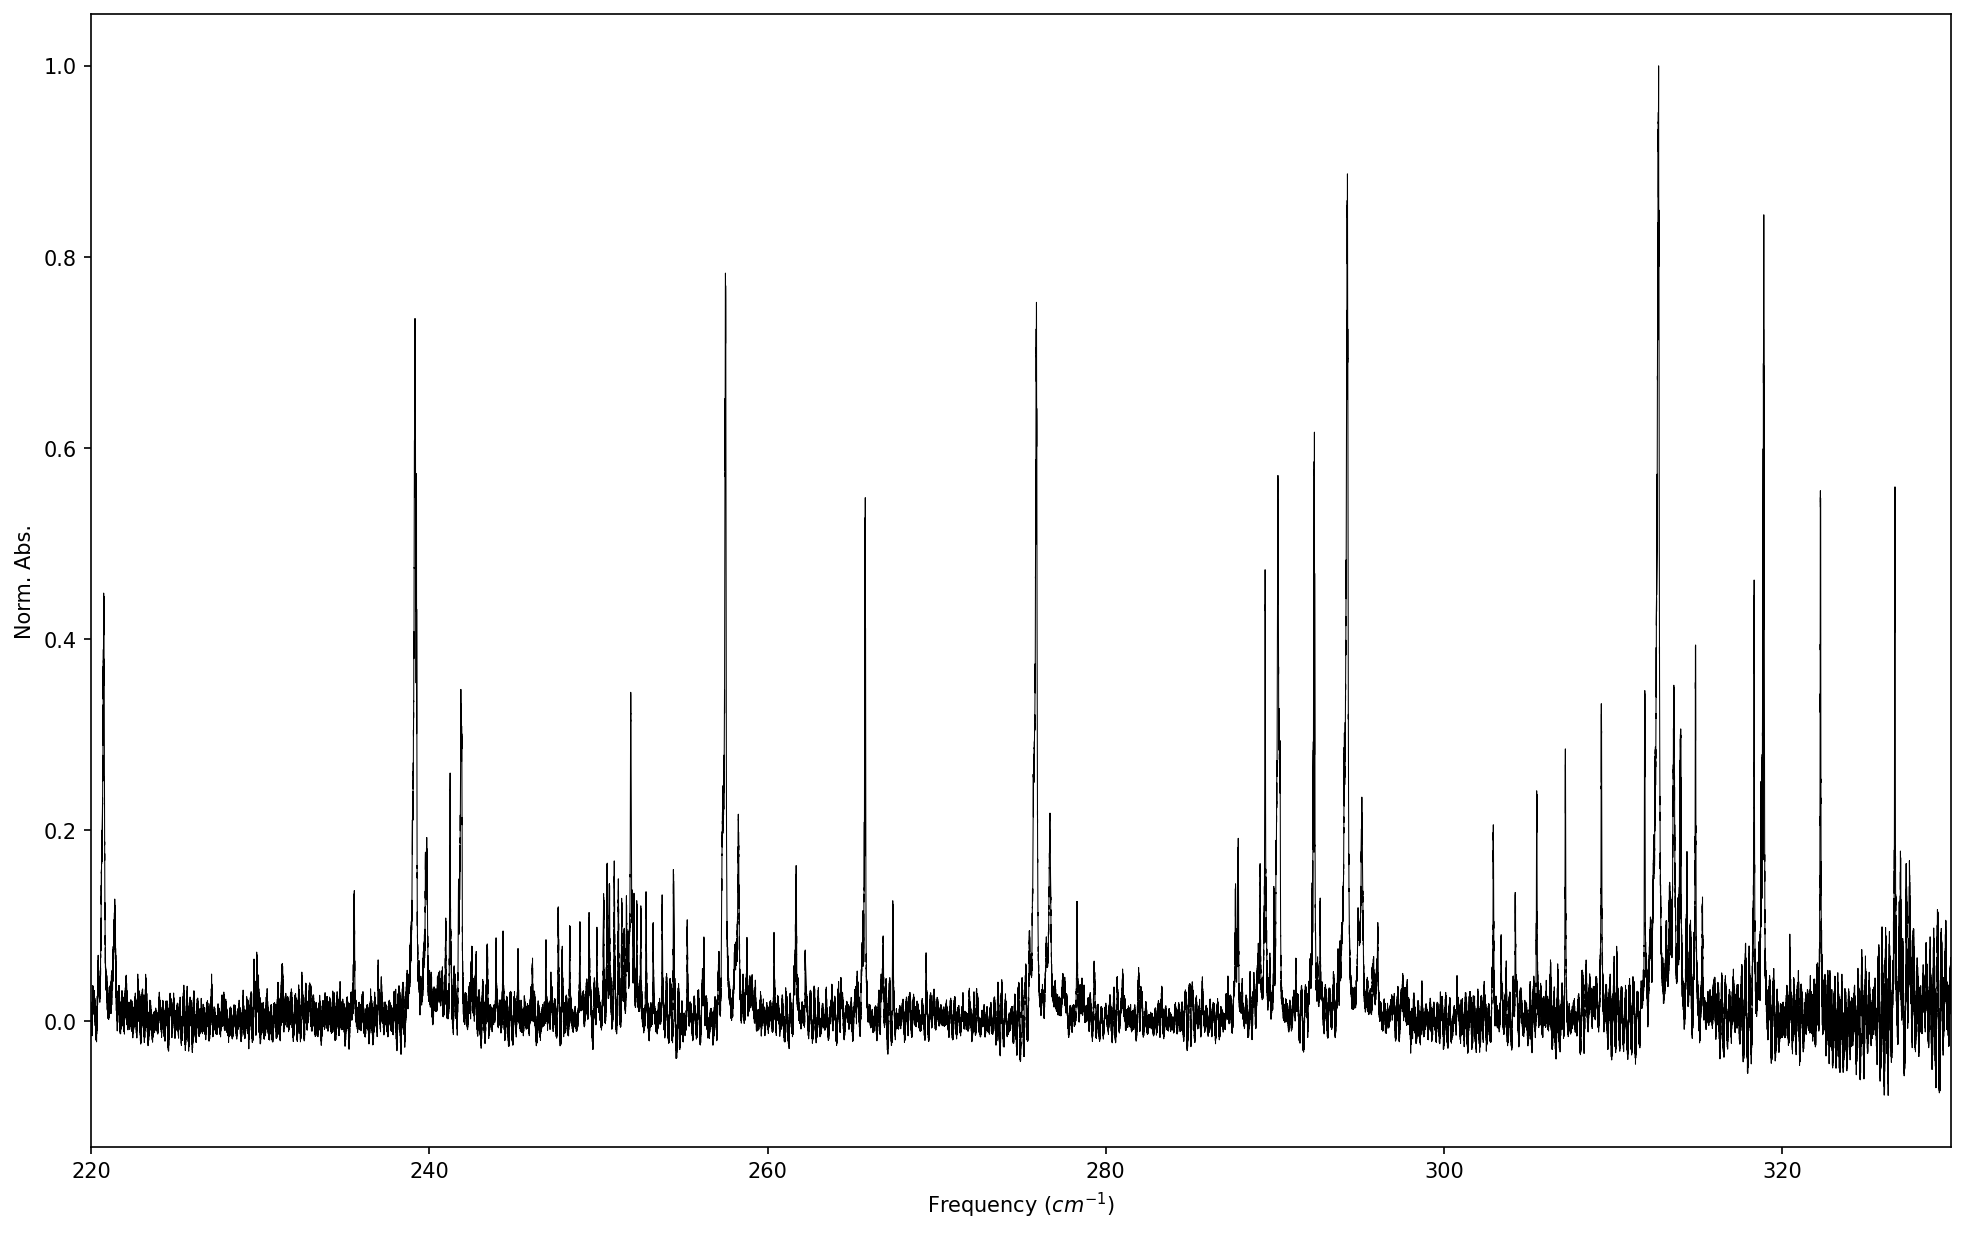

In [13]:
exp_spectrum_fig(freq_exp1,abs_exp1)